## NBA championship probability Team A wins 

#### In many professional sports, the championship features two teams playing a series of up to n games where n is odd. The first team to win (n+1)/2 games wins the series. For example, in the National Basketball Association (NBA), the championship is a series of up to 7 games where the first team to win 4 games is declared the winner. Suppose that the probability that Team A beats Team B in any given game is p > 0.5, independent of the outcome of all other games. For a series of up to n games (n is odd) and a game-win probability p, let f(n,p) be the probability that Team A wins the series.

##### f(n,p) = probability that Team A wins the series

#### Plot f as a function of p > 0.5 for fixed n = 7.

In [2]:
import numpy as np 

import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats.distributions import binom
%matplotlib inline
import math

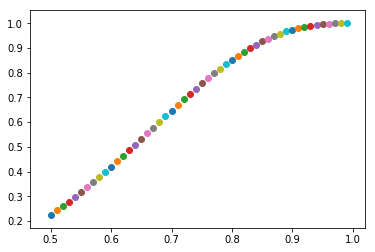

In [3]:
n= 7           #number of trials
p = 0.5        #probability of winning 

for prob in np.arange(p,1, 0.01): 
    
    f = 1-binom.cdf((n+1)/2, n, prob)

    plt.scatter(prob,f)

#### Plot f for fixed p = 0.55 and odd varying from 1 through 21.

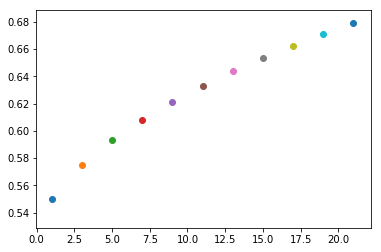

In [22]:
n = 1
p = 0.55

while n <= 21:
        
    #f = 1-binom.cdf((n+1)/2, n, p)
    
    for number in range(int((n+1)/2), n+1, 1):
        #print n
        #print number
        f += binom.pmf(number, n, p)
    
    plt.scatter(n,f)
    
    f= 0
    
    n += 2

#### Observation:
In the first plot we see that the probability of the team winning increases with the increasing of p which makes sense since they are more likely to win the series if they have a higher chance of winning each game.

In the second plot we see that the team has a higher chance of winning the more games it plays.

# Estimate Area of a Unit Circle and $\pi$

#### Generate 10,000 bins uniformly distributed in [-1,1] and plot a histogram of these points using 50 uniform-sized bins. 

(array([ 0.45011541,  0.52763529,  0.55014106,  0.49512695,  0.51263144,
         0.4801231 ,  0.54513977,  0.44761477,  0.45511669,  0.51263144,
         0.51763272,  0.44261349,  0.49762759,  0.44761477,  0.49512695,
         0.48512439,  0.54263913,  0.52513464,  0.49512695,  0.50012823,
         0.51513208,  0.51263144,  0.45511669,  0.4801231 ,  0.44511413,
         0.53763785,  0.52513464,  0.46261862,  0.50512952,  0.54263913,
         0.50262887,  0.50763016,  0.48512439,  0.54263913,  0.53263657,
         0.5651449 ,  0.5101308 ,  0.56014362,  0.46261862,  0.50763016,
         0.52013336,  0.57514747,  0.4676199 ,  0.49012567,  0.48762503,
         0.54764042,  0.42760964,  0.49012567,  0.47512182,  0.44261349]),
 array([ -9.99490775e-01,  -9.59501031e-01,  -9.19511287e-01,
         -8.79521543e-01,  -8.39531799e-01,  -7.99542055e-01,
         -7.59552311e-01,  -7.19562567e-01,  -6.79572823e-01,
         -6.39583079e-01,  -5.99593335e-01,  -5.59603591e-01,
         -5.19613847

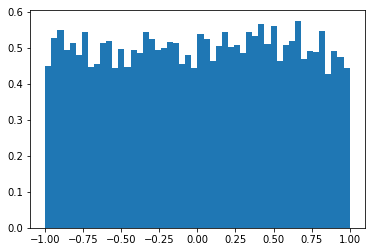

In [24]:
X = np.random.uniform(-1, 1, 10000)
plt.hist(X, bins= 50, normed = True)

#### Generate 10,000 points that are uniformly distributed in a square with corners (-1,-1), (-1,1), (1, -1) and (1,1). To do this, independently generate the x- and y- coordinates of a point to be uniformly distirbuted in (-1,1). Create an additional array Z of length 10,000, which indicates whether each random point lies within a circle of radius 1 centered at the origin. Plot these points using a scatter plot with different colors for points within the circle and points outside. 

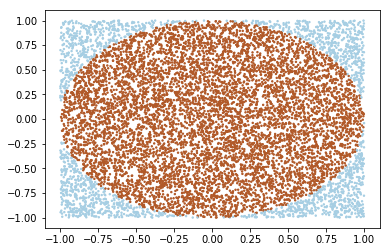

In [25]:
# general code idea from python code from recitation 1

n= 10000

X = np.empty([n,1])
Y = np.empty([n,1])
Z = np.empty([n,1])

for i in range(n):

    X[i] = np.random.uniform(-1,1)
    Y[i] = np.random.uniform(-1,1)

    if (X[i]**2 + Y[i]**2) <= 1:
        Z[i]= 1
    else:
        Z[i]= 0
    
plt.scatter(X,Y, c= Z, s= 2.0, cmap = plt.cm.Paired)

#### Given n random points as above, we can estimate $\pi$ as $\hat{\pi}$<sub>n</sub> $= 4N$<sub>circle</sub> $/ n$, where $N$<sub>circle</sub> is the number of random points which lie within the circle. For $n$ between 1 and 1000, plot the relative error |$\pi$<sub>n</sub> - $\pi$| / $\pi$. Also plot the function 1/$\sqrt{n}$ on the same plot. How do the relative errors compare to this function. 

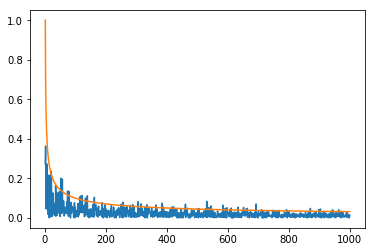

In [26]:
# general code idea from python code from recitation 1

error = np.empty([1000,1])
sqrt = np.empty([1000,1])

for n in range (1,1001):
    
    X = np.empty([n,1])
    Y = np.empty([n,1])
    Z = np.empty([n,1])
    for i in range(n):
        X[i] = np.random.uniform(-1,1)
        Y[i] = np.random.uniform(-1,1)
        if (X[i]**2 + Y[i]**2) <= 1:
            Z[i]= 1
        else:
            Z[i]= 0
      
    estimate = 4* np.sum(Z)/n  
    error[n-1] = np.abs(estimate - math.pi)/math.pi
    sqrt[n-1] = 1/math.sqrt(n)
    
    #print n
    #print estimate
    #print error
#print math.pi

plt.plot(range(1,1001),error)
plt.plot(range(1,1001), sqrt)
plt.show()

The relevant errors seem to correspond well with the shape of this function. 

#### What is the exact probability that a random point (X,Y) falls inside the circle described by {(x,y): x^2 + y^2 <= 1}? Give a simple expression for an estimate $\pi$ based on the number of points that fall inside the circle, $N$<sub>circle</sub>?

The area of the circle is $\pi\cdot r $ <sup>2</sup>= $\pi$ , the area of the square is 4. Dividing the area of the circle, by the area of the square gives $\frac{\pi}{4}$.

$\frac{\pi}{4}$≈$\frac{Ninner}{Ntotal}$

estimate $\pi$ = 4N<sub>circle</sub>/n
where n is the number of random points

#### How many random points n should be generated in order to obtain an estimate of π that is accurate to two decimal places with 90% confidence? Hint: To achieve two digits of precision, what is the confidence interval half-width you need to attain?

The probability of being in the circle is N<sub>circle</sub>/n.
Since $\pi = 4 \cdot \frac{N_{circle}}{n}$, the 90% confidence interval for two digits of precision can be given as the following:


$$4 \cdot \sqrt{\frac{\sigma^2}{n} } z_{\frac{\alpha}{2}} \le 0.005 $$

$$4 \cdot \sqrt{\frac{{ \frac{\pi}{4} \bigg( 1-\frac{\pi}{4} \bigg) }}{n} } z_{\frac{\alpha}{2}} \le 0.005$$  since  $\sigma = \sqrt{ \frac{\pi}{4} \bigg( 1-\frac{\pi}{4} \bigg) } \text{ and } \alpha = 0.1 $ and we are looking for two digit precision. 


Thus,  
$$n \ge \Bigg( \frac{4 \cdot \sqrt{\frac{\pi}{4} \bigg( 1-\frac{\pi}{4} \bigg) } \cdot z_{0.05} }{0.005} \Bigg)^2 $$

In [32]:
from math import pi
import scipy as sp
p = pi/4
var = p*(1-p)

n = (4*np.sqrt(var)*sp.stats.norm.ppf(0.95)/0.005)**2 
print (n)

291848.727022


Since, we need at least 90% confidence interval we will round up 291848.727022 to 291,849.

#### Obtain an estimate of π based on the number of points you determined above. Report estimate of π and a 90% fixed-sample confidence interval.

In [35]:
num = int(n)+1
#print num

X = np.random.uniform(-1, 1, num)
Y = np.random.uniform(-1, 1, num)
Z = ((X**2 + Y**2)<=1) + 0
#print np.sum(z)

p = np.sum(Z)/float(num)
#print "p = " + str(p)

var = p*(1-p)
halfwidth = np.sqrt(var/num)*scipy.stats.norm.ppf(0.95)

LB = 4*(p - halfwidth) #lowerboud
UB = 4*(p + halfwidth) #upperbound

pi_est = 4*p
print ("Estimate of pi: " + str(pi_est))
print ("90% fixed-sample confidence interval: " + str((LB,UB)))

Estimate of pi: 3.14029515263
90% fixed-sample confidence interval: (3.1352924109988378, 3.1452978942617595)
